## Random Forest
- 랜덤포레스트는 배깅에 랜던 과정을 추가한 방법 
- 원 자료로 부터붓스트랩 샘플을 추출하고, 각 붓스트랩 샘플에 대해 트리를 형성해 나가는 과정은 배깅과 유사하나, 각 노드마다 모든 예측변수 안에서 최적의 분할을 선택하는 방법 대신, 예측변수들을 임의로 추출하고, 추출된 변수 내에서 최적의 분할을 만들어 나가는 방법

#### -1. 데이터 읽기 및 전처리

In [3]:
library(randomForest)
library(rpart)

In [4]:
data(stagec)

In [5]:
#전처리 - 결측치 제거
stagec3 <- stagec[complete.cases(stagec),]

In [6]:
set.seed(1234)

#### -2. set 나누기 ( train, test)

In [9]:
ind <- sample(2, nrow(stagec3), replace=TRUE, prob=c(0.7,0.3))
trainData <- stagec3[ind==1,]
testData <- stagec3[ind==2,]

#### -3 실행

In [10]:
rf <- randomForest(ploidy ~., data=trainData, ntree=100, proximity=TRUE)

#### -4. 예측

In [13]:
table(predict(rf), trainData$ploidy)

            
             diploid tetraploid aneuploid
  diploid         42          0         3
  tetraploid       1         46         0
  aneuploid        1          0         0

In [14]:
print(rf)


Call:
 randomForest(formula = ploidy ~ ., data = trainData, ntree = 100,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.38%
Confusion matrix:
           diploid tetraploid aneuploid class.error
diploid         42          1         1  0.04545455
tetraploid       0         46         0  0.00000000
aneuploid        3          0         0  1.00000000


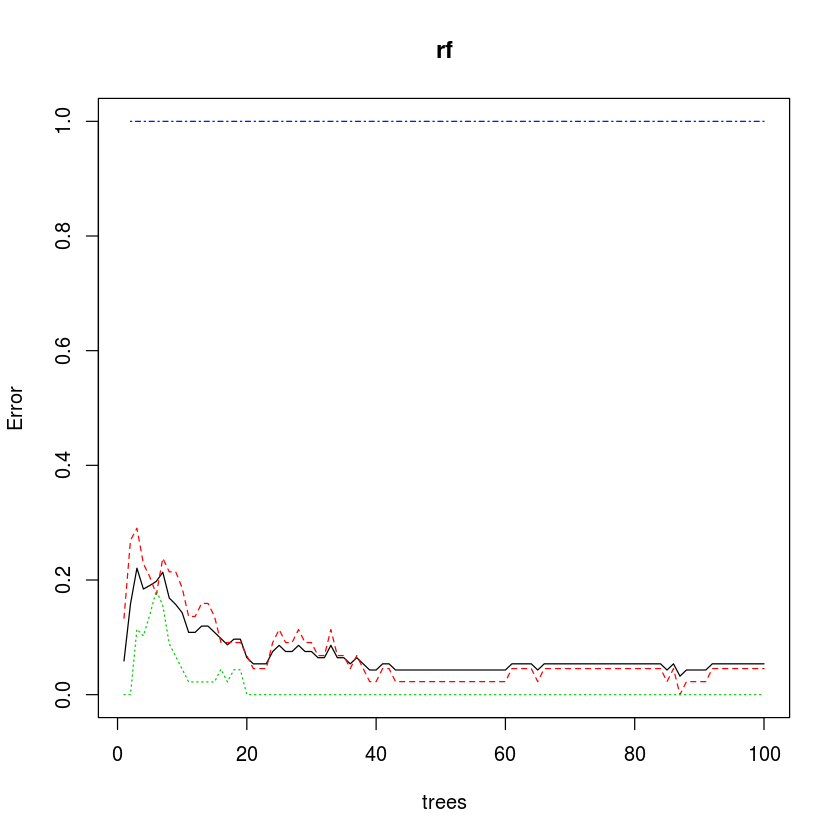

In [15]:
plot(rf)

In [16]:
importance(rf)
# 변수의 중요성  g2가 매우 중요함

,MeanDecreaseGini
pgtime,4.8191940
pgstat,2.4954955
age,3.6039771
eet,1.4269801
g2,32.4088168
grade,0.8609083
gleason,2.2830731


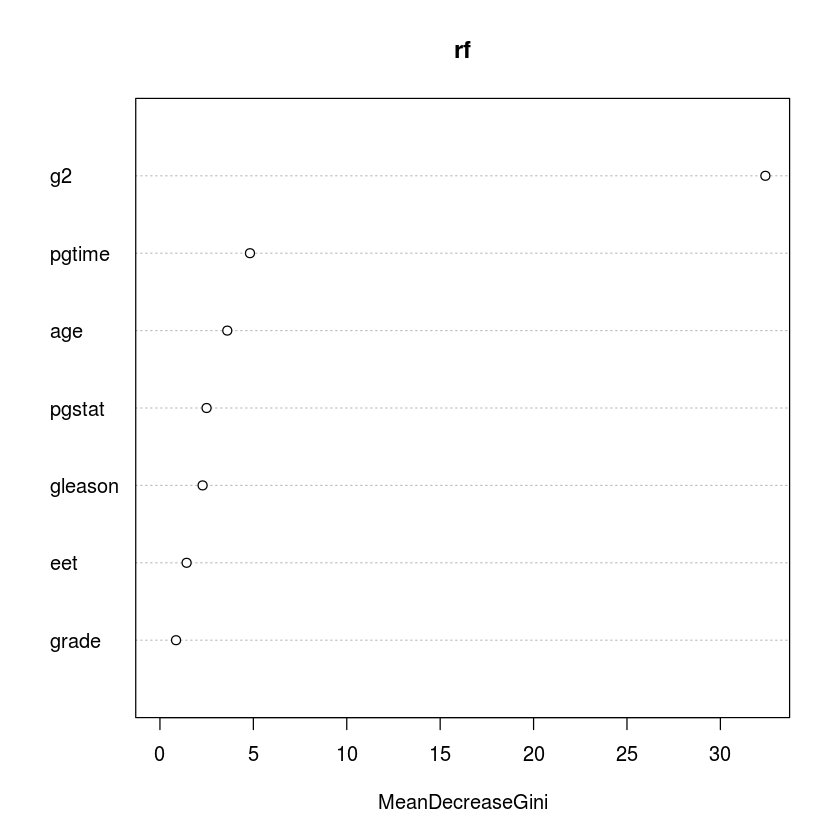

In [17]:
varImpPlot(rf)
# 변수의 중요성  g2가 매우 중요함

#### -5. test set 에 모델 적용

In [18]:
rf.pred <- predict(rf, newdata=testData)
table(rf.pred, testData$ploidy)

            
rf.pred      diploid tetraploid aneuploid
  diploid         21          0         1
  tetraploid       0         18         1
  aneuploid        0          0         0

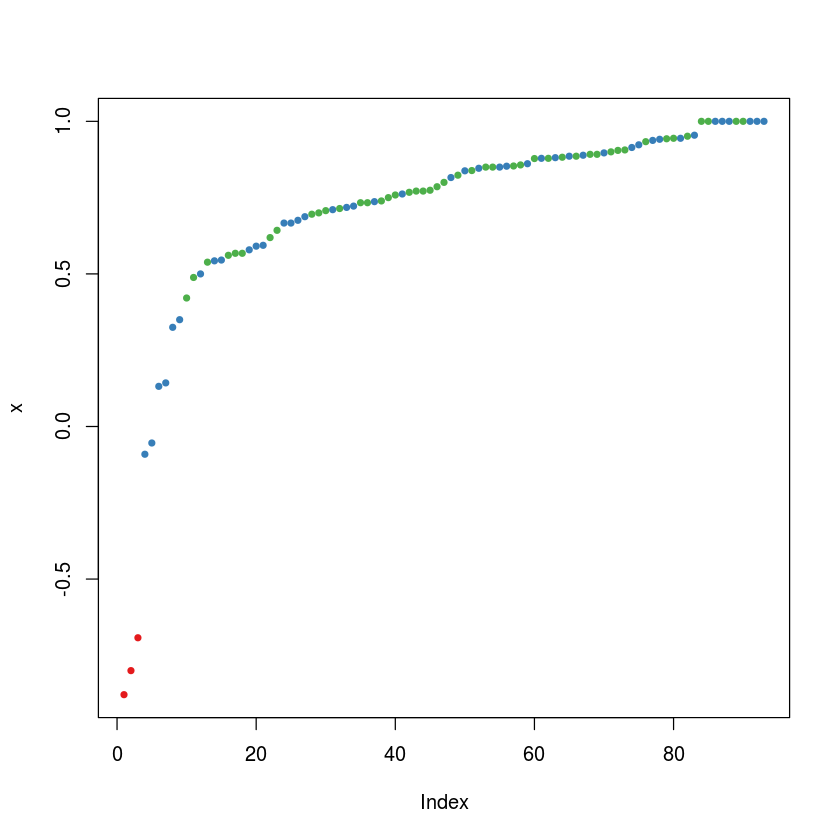

In [19]:
plot(margin(rf))
# 아래의 그림은 훈련용 자료값(총 102개)의 마진을 나타낸다. 
# 마진은 랜덤포레스트의 분류기 가운데 정분류를 수행한 비율에서 다른 클래스로 분류한 비율의 최대치를 뺀 값
# 양의 마진은 정확한 분류를 의미, 음은 그 반대